In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import itertools
import statsmodels.api as sm

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# from google.colab import drive
# drive.mount('/content/drive',force_remount=True)
# path = '/content/drive/MyDrive/Data_Science/datasets/'

path = 'datasets/'
cumtd_data = '00CUMTD_Route_Ridership_By_Day_September_2022_2023.csv'
data_file = path + cumtd_data # get the directory of the file

In [5]:
# import os # if you want to be inside this directory
# os.chdir('/content/drive/MyDrive/01_ITE/Projects/Data_Science')

In [6]:
dataframe = pd.read_csv(data_file) # read in the csv file
dataframe

,Date,Line,In (Sum),Out (Sum),Load (Avg.),Load max,#APC-Trips
0,2022-08-31T19:00:00-05:00,1 YELLOW ALT,34,34,8.1,33,2
1,2022-08-31T19:00:00-05:00,10W GOLD ALT,47,47,14.6,43,1
2,2022-08-31T19:00:00-05:00,1N YELLOW ALT,140,140,24.0,87,2
3,2022-08-31T19:00:00-05:00,1N YELLOW ALT PM,41,41,15.5,41,1
4,2022-08-31T19:00:00-05:00,1S YELLOW ALT,120,120,8.2,56,3
...,...,...,...,...,...,...,...
15774,2023-09-29T19:00:00-05:00,TEAL LATE NIGHT SATURDAY,163,163,3.2,21,16
15775,2023-09-29T19:00:00-05:00,TEAL SATURDAY,"1,980","1,980",9.0,53,74
15776,2023-09-29T19:00:00-05:00,YELLOW EVENING SATURDAY,868,868,6.0,79,26
15777,2023-09-29T19:00:00-05:00,YELLOW LATE NIGHT SATURDAY,79,79,0.7,13,21


In [7]:
colums_to_traverse = dataframe.keys()[2:] # these are the columns we will be traversing for out data analysis
colums_to_traverse

Index(['In (Sum)', 'Out (Sum)', 'Load (Avg.)', 'Load max', '#APC-Trips'], dtype='object')

In [8]:
dataframe['Date'] = pd.to_datetime(dataframe['Date'])
dataframe

,Date,Line,In (Sum),Out (Sum),Load (Avg.),Load max,#APC-Trips
0,2022-08-31 19:00:00-05:00,1 YELLOW ALT,34,34,8.1,33,2
1,2022-08-31 19:00:00-05:00,10W GOLD ALT,47,47,14.6,43,1
2,2022-08-31 19:00:00-05:00,1N YELLOW ALT,140,140,24.0,87,2
3,2022-08-31 19:00:00-05:00,1N YELLOW ALT PM,41,41,15.5,41,1
4,2022-08-31 19:00:00-05:00,1S YELLOW ALT,120,120,8.2,56,3
...,...,...,...,...,...,...,...
15774,2023-09-29 19:00:00-05:00,TEAL LATE NIGHT SATURDAY,163,163,3.2,21,16
15775,2023-09-29 19:00:00-05:00,TEAL SATURDAY,"1,980","1,980",9.0,53,74
15776,2023-09-29 19:00:00-05:00,YELLOW EVENING SATURDAY,868,868,6.0,79,26
15777,2023-09-29 19:00:00-05:00,YELLOW LATE NIGHT SATURDAY,79,79,0.7,13,21


In [9]:
bus_lines = dataframe['Line'].unique() # we want to see how many unique bus lines there are
print(f'CUMTD bus lines: {bus_lines}')

CUMTD bus lines: ['1 YELLOW ALT' '10W GOLD ALT' '1N YELLOW ALT' '1N YELLOW ALT PM'
 '1S YELLOW ALT' '3S LAVENDER ALT' '5E GREEN EXPRESS 1 ALT'
 '5E GREEN EXPRESS ALT' '5W GREEN ALT 2' '5W GREEN EXPRESS 2'
 '7E GREY ALT' '7W GREY ALT' 'BLUE' 'BRONZE' 'BRONZE ALT' 'BROWN'
 'BROWN ALT' 'BROWN ALT PM' 'BROWN ALT1' 'GOLD' 'GOLD ALT' 'GOLDHOPPER'
 'GREEN' 'GREEN ALT' 'GREEN EVENING' 'GREEN EXPRESS' 'GREEN EXPRESS ALT'
 'GREEN LATE NIGHT' 'GREENHOPPER' 'GREENHOPPER EVENING' 'GREY' 'GREY ALT'
 'GREY EVENING' 'ILLINI' 'ILLINI EVENING' 'LAVENDER' 'LAVENDER ALT'
 'LIME EVENING' 'LINK' 'NAVY' 'ORANGE' 'ORANGE ALT' 'ORANGEHOPPER' 'PINK'
 'PINK ALT' 'RAVEN' 'RED' 'RUBY' 'RUBY EVENING' 'SILVER' 'SILVER EVENING'
 'SILVER LATE NIGHT' 'TEAL' 'TEAL EVENING' 'TEAL LATE NIGHT' 'YELLOW'
 'YELLOW EVENING' 'YELLOW LATE NIGHT' 'YELLOWHOPPER'
 'GREEN EVENING SATURDAY' 'GREEN LATE NIGHT SATURDAY' 'GREEN SATURDAY'
 'GREENHOPPER EVENING SATURDAY' 'GREY EVENING SATURDAY' 'GREY SATURDAY'
 'ILLINI EVENING SATURDAY' '

In [10]:
orange_bus_lines = [line for line in bus_lines if "orange" in line.lower()]
orange_bus_lines

['ORANGE', 'ORANGE ALT', 'ORANGEHOPPER', 'TEST ORANGE']

In [11]:
# Define the list of line names you're interested in
lines_of_interest = orange_bus_lines

# Filter the dataframe based on the list
filtered_dataframe = dataframe[dataframe['Line'].isin(lines_of_interest)]
filtered_dataframe

,Date,Line,In (Sum),Out (Sum),Load (Avg.),Load max,#APC-Trips
40,2022-08-31 19:00:00-05:00,ORANGE,678,678,2.1,18,83
41,2022-08-31 19:00:00-05:00,ORANGE ALT,91,91,8.6,47,5
42,2022-08-31 19:00:00-05:00,ORANGEHOPPER,296,296,2.9,12,44
99,2022-09-01 19:00:00-05:00,ORANGE,661,661,2.0,17,85
100,2022-09-01 19:00:00-05:00,ORANGE ALT,104,104,9.7,50,5
...,...,...,...,...,...,...,...
15682,2023-09-27 19:00:00-05:00,ORANGE ALT,97,97,9.5,50,5
15683,2023-09-27 19:00:00-05:00,ORANGEHOPPER,332,332,3.6,16,47
15739,2023-09-28 19:00:00-05:00,ORANGE,722,722,2.1,23,92
15740,2023-09-28 19:00:00-05:00,ORANGE ALT,73,73,6.1,40,5


In [12]:
mask = filtered_dataframe['Line'] == 'ORANGE'
orange = filtered_dataframe[mask]
orange

,Date,Line,In (Sum),Out (Sum),Load (Avg.),Load max,#APC-Trips
40,2022-08-31 19:00:00-05:00,ORANGE,678,678,2.1,18,83
99,2022-09-01 19:00:00-05:00,ORANGE,661,661,2.0,17,85
194,2022-09-05 19:00:00-05:00,ORANGE,679,679,1.7,17,85
252,2022-09-06 19:00:00-05:00,ORANGE,661,661,2.2,14,83
311,2022-09-07 19:00:00-05:00,ORANGE,647,647,2.2,24,86
...,...,...,...,...,...,...,...
15508,2023-09-24 19:00:00-05:00,ORANGE,649,649,2.2,16,80
15565,2023-09-25 19:00:00-05:00,ORANGE,383,383,1.5,15,68
15623,2023-09-26 19:00:00-05:00,ORANGE,676,676,2.0,21,89
15681,2023-09-27 19:00:00-05:00,ORANGE,669,669,2.1,24,83


In [13]:
orange = orange.set_index('Date')
orange = orange.asfreq('D')
orange.index

DatetimeIndex(['2022-08-31 19:00:00-05:00', '2022-09-01 19:00:00-05:00',
               '2022-09-02 19:00:00-05:00', '2022-09-03 19:00:00-05:00',
               '2022-09-04 19:00:00-05:00', '2022-09-05 19:00:00-05:00',
               '2022-09-06 19:00:00-05:00', '2022-09-07 19:00:00-05:00',
               '2022-09-08 19:00:00-05:00', '2022-09-09 19:00:00-05:00',
               ...
               '2023-09-19 19:00:00-05:00', '2023-09-20 19:00:00-05:00',
               '2023-09-21 19:00:00-05:00', '2023-09-22 19:00:00-05:00',
               '2023-09-23 19:00:00-05:00', '2023-09-24 19:00:00-05:00',
               '2023-09-25 19:00:00-05:00', '2023-09-26 19:00:00-05:00',
               '2023-09-27 19:00:00-05:00', '2023-09-28 19:00:00-05:00'],
              dtype='datetime64[ns, UTC-05:00]', name='Date', length=394, freq='D')

In [14]:
orange.isnull().sum()

Line           117
In (Sum)       117
Out (Sum)      117
Load (Avg.)    117
Load max       117
#APC-Trips     117
dtype: int64

In [15]:
y_var = 'Load max'

In [16]:
y = orange[y_var]
y = y.asfreq('D')

In [17]:
print(y.isnull().sum())

117


In [18]:
y = y.fillna(y.mean())

In [19]:
print(y.isnull().sum())

0


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Data_Science/figures/Mitchell_LoadMax_Orange_Observed.png'

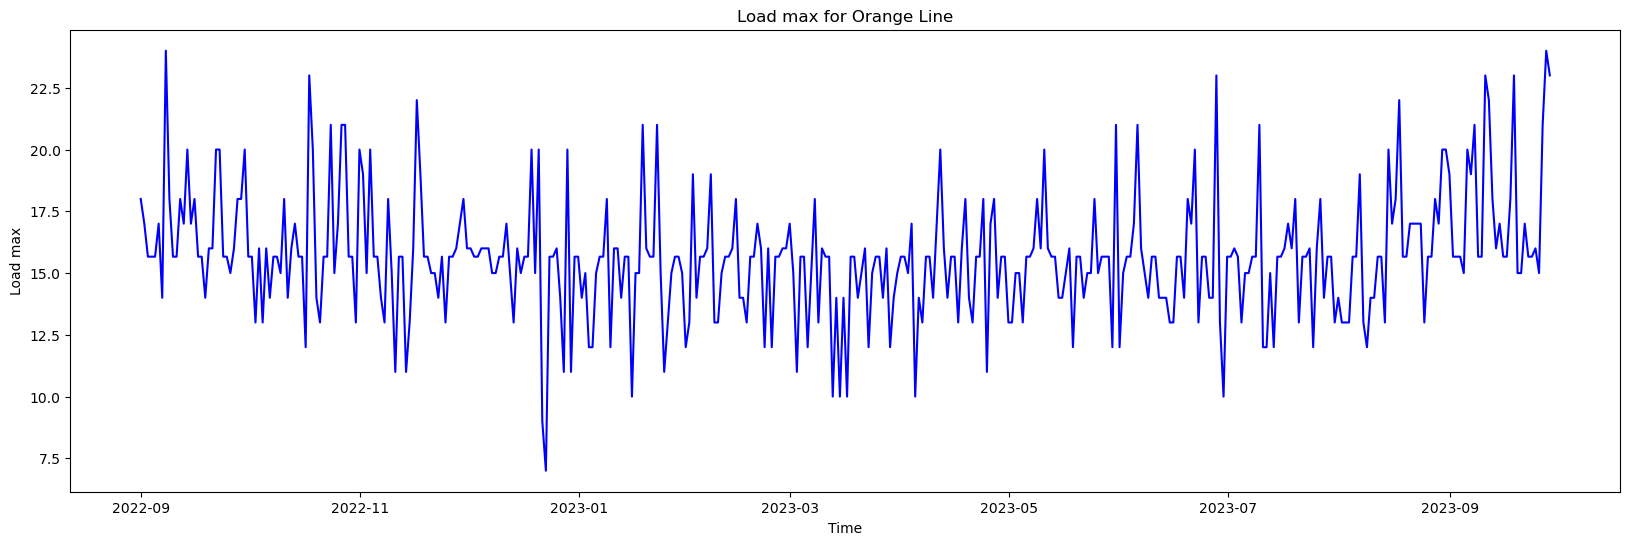

In [20]:
plt.figure(figsize=(20, 6))
plt.plot(y, label='Observed Data', color='blue')
plt.title('Load max for Orange Line')
plt.xlabel('Time')
plt.ylabel('Load max')
plt.savefig('/content/drive/MyDrive/Data_Science/figures/Mitchell_LoadMax_Orange_Observed.png')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing

model = ExponentialSmoothing(y, seasonal='mul', seasonal_periods=160).fit()

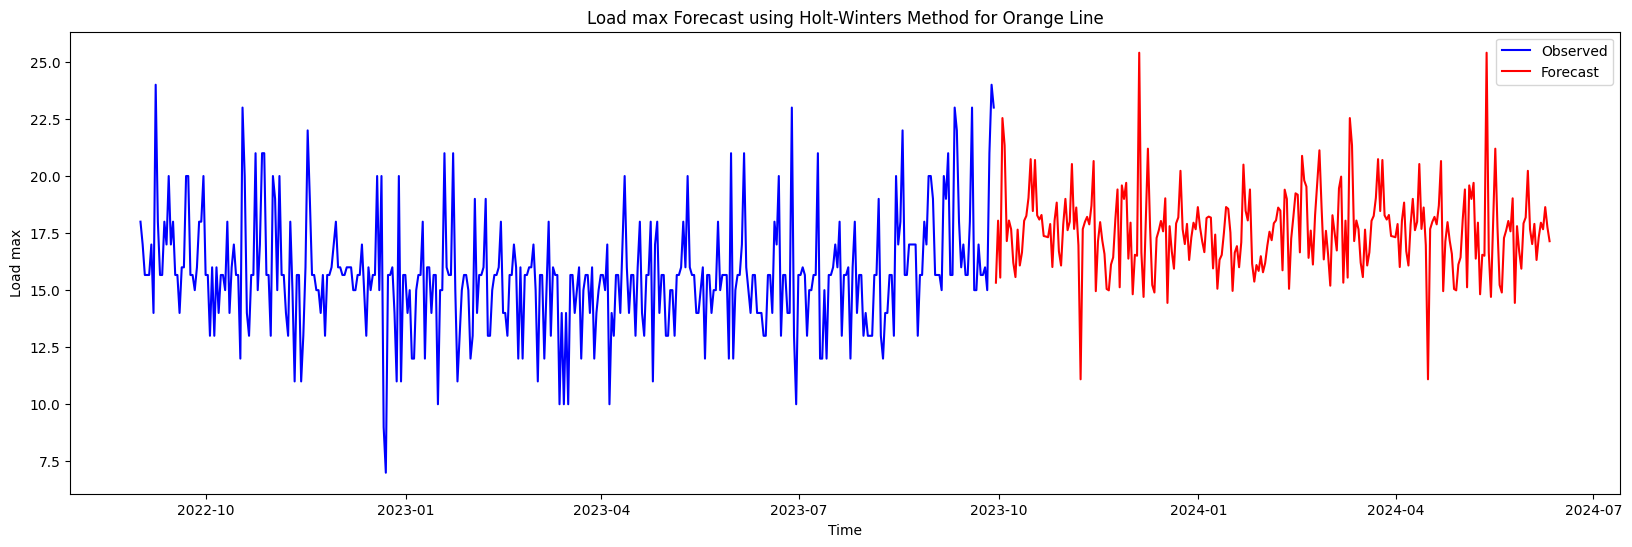

<Figure size 640x480 with 0 Axes>

In [ ]:
y_forecasted = model.forecast(steps=256)
plt.figure(figsize=(20, 6))
plt.plot(y, label='Observed', color='blue')
plt.plot(y_forecasted, label='Forecast', color='red')
plt.title('Load max Forecast using Holt-Winters Method for Orange Line')
plt.xlabel('Time')
plt.ylabel('Load max')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Data_Science/figures/Mitchell_LoadMax_Orange_predictions.png')

In [ ]:
# This is the start of the "In (Sum)" analysis
y_var_InSum = 'In (Sum)'

In [ ]:
y2 = orange[y_var_InSum]
y2 = y2.asfreq('D')

In [ ]:
print(y2.isnull().sum())

117


In [ ]:
# Convert y2 to float64 because I can't plot a objects type using plt.plot (y2 was an object before)
y2 = pd.to_numeric(y2, errors='coerce')
y2

Date
2022-08-31 19:00:00-05:00    678.000000
2022-09-01 19:00:00-05:00    661.000000
2022-09-02 19:00:00-05:00    585.187726
2022-09-03 19:00:00-05:00    585.187726
2022-09-04 19:00:00-05:00    585.187726
                                ...    
2023-09-24 19:00:00-05:00    649.000000
2023-09-25 19:00:00-05:00    383.000000
2023-09-26 19:00:00-05:00    676.000000
2023-09-27 19:00:00-05:00    669.000000
2023-09-28 19:00:00-05:00    722.000000
Freq: D, Name: In (Sum), Length: 394, dtype: float64

In [ ]:
y2 = y2.fillna(y2.mean())

In [ ]:
print(y2.isnull().sum())

0


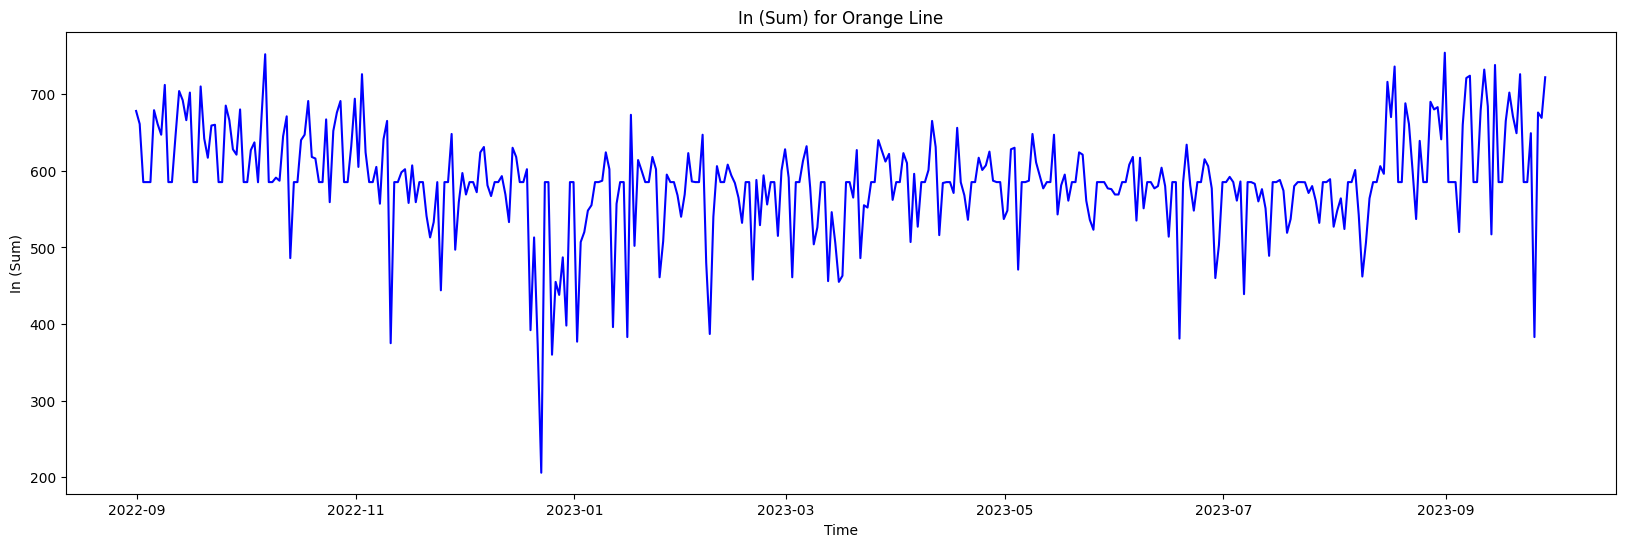

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(y2, label='Observed Data', color='blue')
plt.title('In (Sum) for Orange Line')
plt.xlabel('Time')
plt.ylabel('In (Sum)')
plt.savefig('/content/drive/MyDrive/Data_Science/figures/Mitchell_InSum_Orange_Observed.png')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing

model = ExponentialSmoothing(y2, seasonal='mul', seasonal_periods=160).fit()

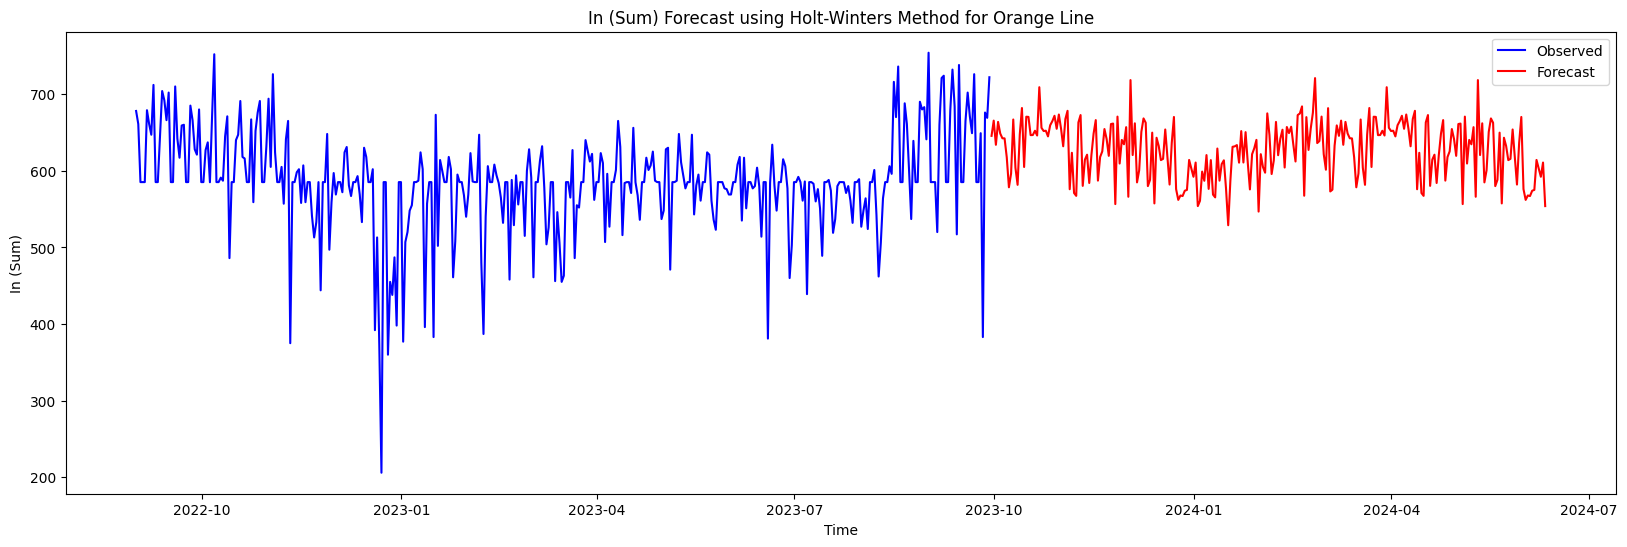

<Figure size 640x480 with 0 Axes>

In [ ]:
y2_forecasted = model.forecast(steps=256)
plt.figure(figsize=(20, 6))
plt.plot(y2, label='Observed', color='blue')
plt.plot(y2_forecasted, label='Forecast', color='red')
plt.title('In (Sum) Forecast using Holt-Winters Method for Orange Line')
plt.xlabel('Time')
plt.ylabel('In (Sum)')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Data_Science/figures/Mitchell_InSum_Orange_predictions.png')

In [ ]:
# This is the start of the "Out (Sum)" analysis
y_var_OutSum = 'Out (Sum)'

In [ ]:
y3 = orange[y_var_OutSum]
y3 = y3.asfreq('D')

In [ ]:
print(y3.isnull().sum())

117


In [ ]:
# Convert y3 to float64 because I can't plot a objects type using plt.plot (y3 was an object before)
y3 = pd.to_numeric(y3, errors='coerce')
y3

Date
2022-08-31 19:00:00-05:00    678.0
2022-09-01 19:00:00-05:00    661.0
2022-09-02 19:00:00-05:00      NaN
2022-09-03 19:00:00-05:00      NaN
2022-09-04 19:00:00-05:00      NaN
                             ...  
2023-09-24 19:00:00-05:00    649.0
2023-09-25 19:00:00-05:00    383.0
2023-09-26 19:00:00-05:00    676.0
2023-09-27 19:00:00-05:00    669.0
2023-09-28 19:00:00-05:00    722.0
Freq: D, Name: Out (Sum), Length: 394, dtype: float64

In [ ]:
y3 = y3.fillna(y3.mean())

In [ ]:
print(y3.isnull().sum())

0


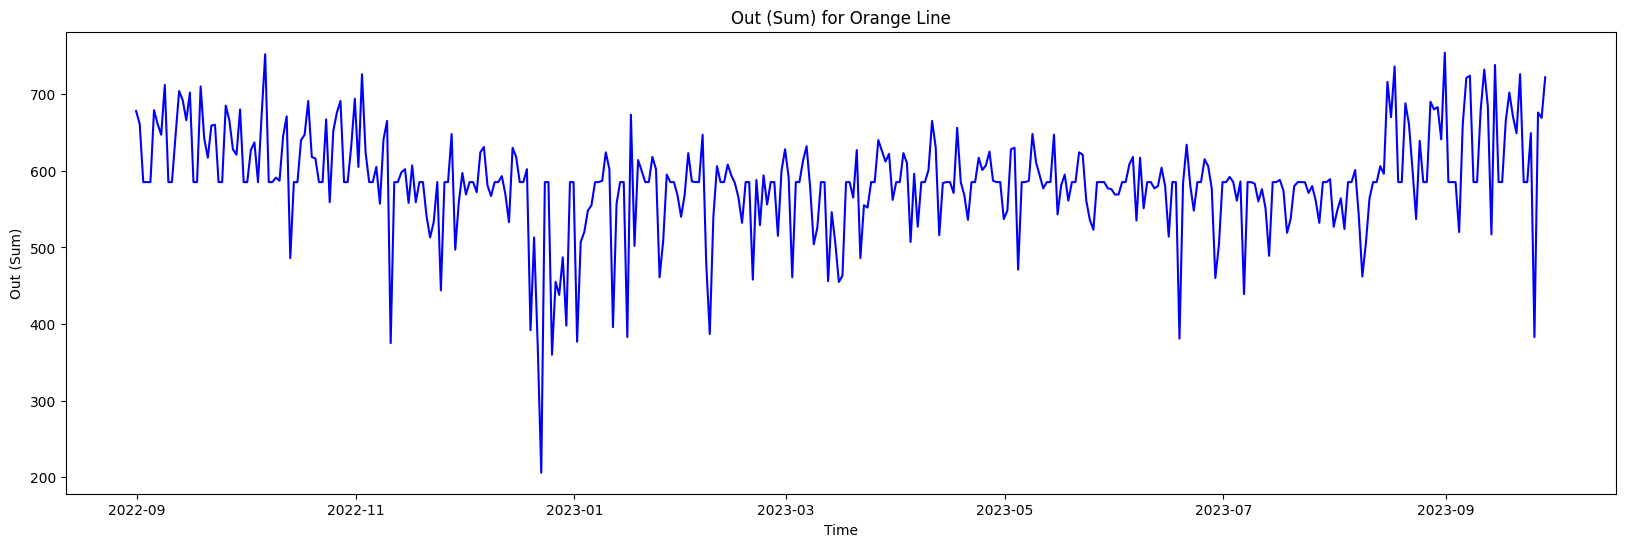

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(y3, label='Observed Data', color='blue')
plt.title('Out (Sum) for Orange Line')
plt.xlabel('Time')
plt.ylabel('Out (Sum)')
plt.savefig('/content/drive/MyDrive/Data_Science/figures/Mitchell_OutSum_Orange_Observed.png')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing

model = ExponentialSmoothing(y3, seasonal='mul', seasonal_periods=160).fit()

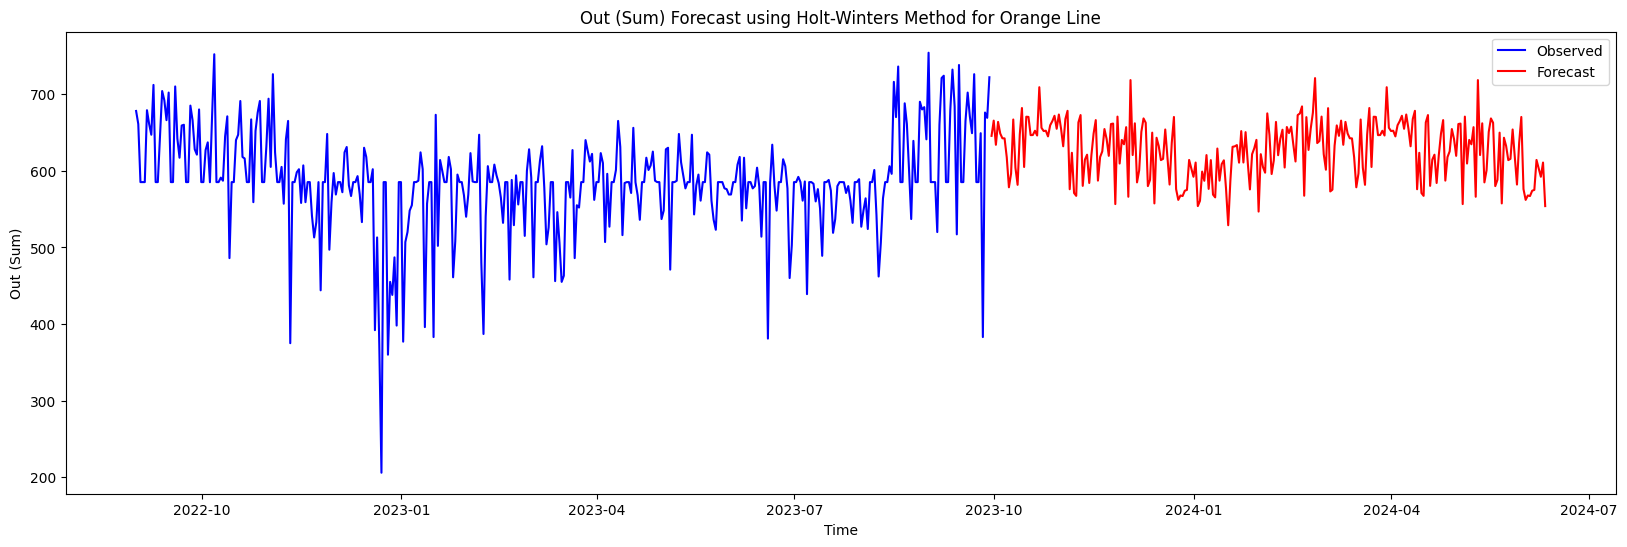

<Figure size 640x480 with 0 Axes>

In [ ]:
y3_forecasted = model.forecast(steps=256)
plt.figure(figsize=(20, 6))
plt.plot(y3, label='Observed', color='blue')
plt.plot(y3_forecasted, label='Forecast', color='red')
plt.title('Out (Sum) Forecast using Holt-Winters Method for Orange Line')
plt.xlabel('Time')
plt.ylabel('Out (Sum)')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Data_Science/figures/Mitchell_OutSum_Orange_predictions.png')

In [ ]:
# This is the start of the "Load (Avg.)" analysis
y_var_LoadAvg = 'Load (Avg.)'

In [ ]:
y4 = orange[y_var_LoadAvg]
y4 = y4.asfreq('D')

In [ ]:
print(y4.isnull().sum())

117


In [ ]:
# Convert y4 to float64 because I can't plot a objects type using plt.plot (y4 was an object before)
y4 = pd.to_numeric(y4, errors='coerce')
y4

Date
2022-08-31 19:00:00-05:00    2.1
2022-09-01 19:00:00-05:00    2.0
2022-09-02 19:00:00-05:00    NaN
2022-09-03 19:00:00-05:00    NaN
2022-09-04 19:00:00-05:00    NaN
                            ... 
2023-09-24 19:00:00-05:00    2.2
2023-09-25 19:00:00-05:00    1.5
2023-09-26 19:00:00-05:00    2.0
2023-09-27 19:00:00-05:00    2.1
2023-09-28 19:00:00-05:00    2.1
Freq: D, Name: Load (Avg.), Length: 394, dtype: float64

In [ ]:
y4 = y4.fillna(y4.mean())

In [ ]:
print(y4.isnull().sum())

0


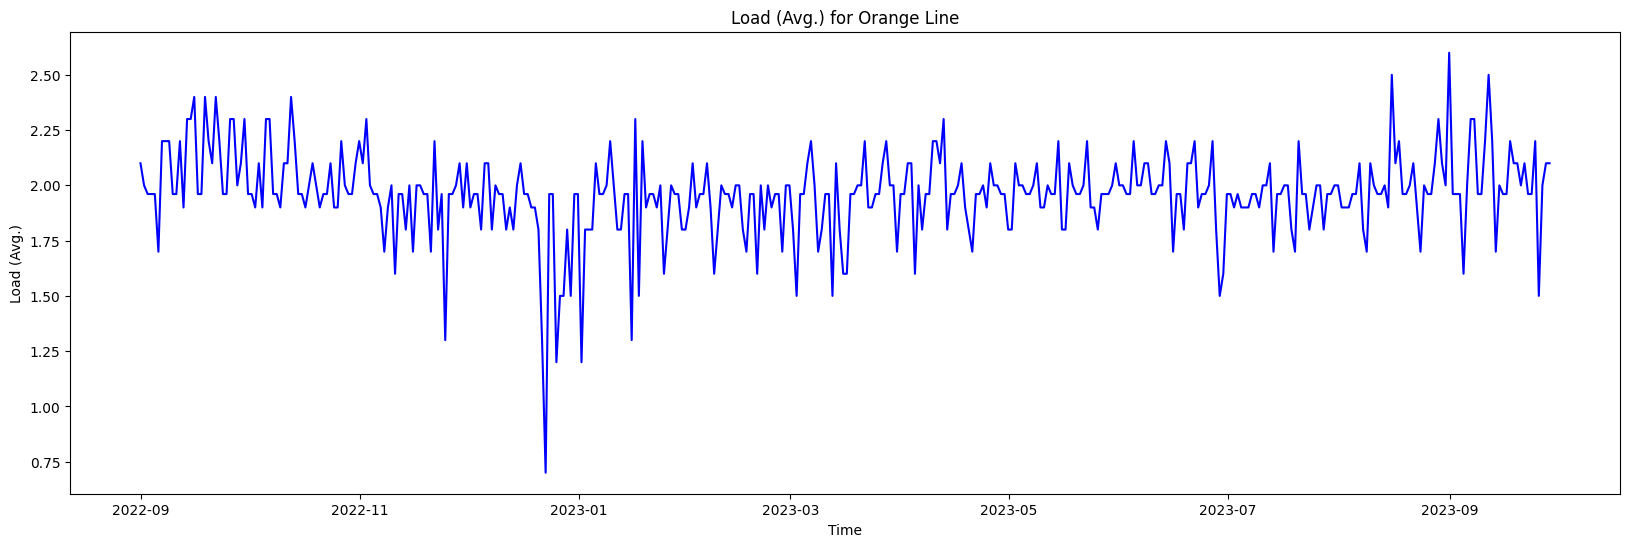

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(y4, label='Observed Data', color='blue')
plt.title('Load (Avg.) for Orange Line')
plt.xlabel('Time')
plt.ylabel('Load (Avg.)')
plt.savefig('/content/drive/MyDrive/Data_Science/figures/Mitchell_LoadAvg_Orange_Observed.png')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing

model = ExponentialSmoothing(y4, seasonal='mul', seasonal_periods=160).fit()

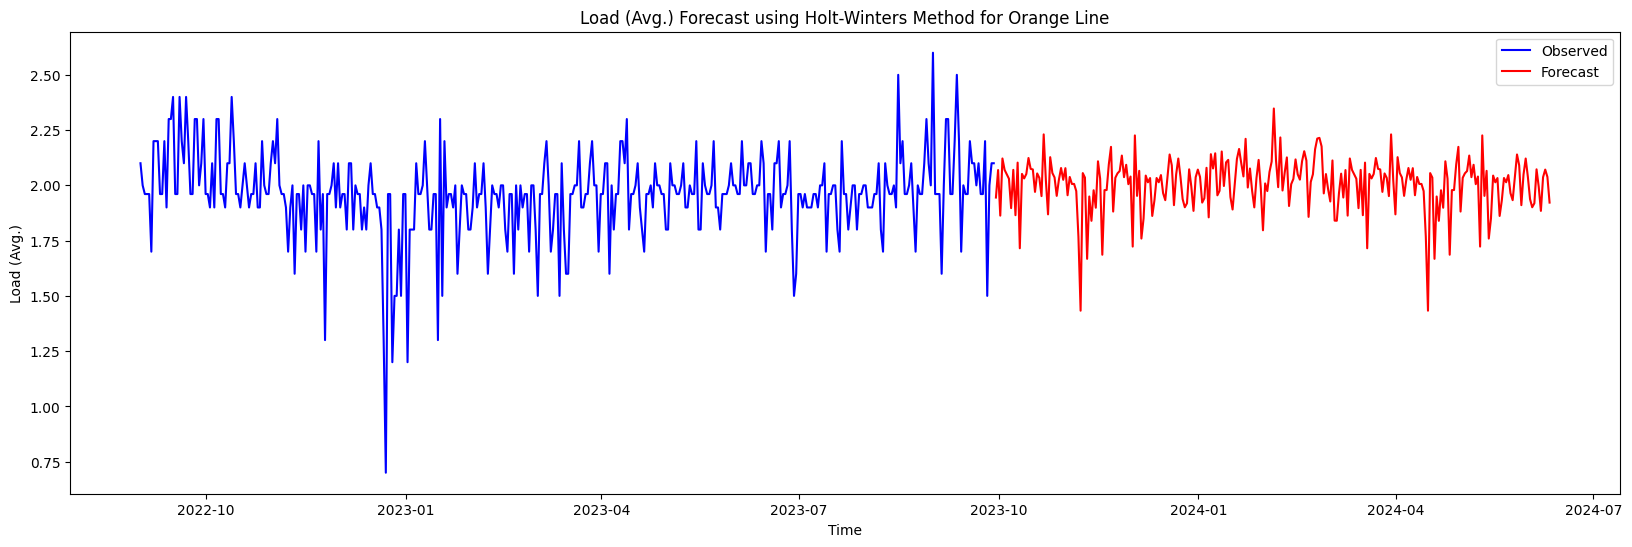

<Figure size 640x480 with 0 Axes>

In [ ]:
y4_forecasted = model.forecast(steps=256)
plt.figure(figsize=(20, 6))
plt.plot(y4, label='Observed', color='blue')
plt.plot(y4_forecasted, label='Forecast', color='red')
plt.title('Load (Avg.) Forecast using Holt-Winters Method for Orange Line')
plt.xlabel('Time')
plt.ylabel('Load (Avg.)')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Data_Science/figures/Mitchell_LoadAvg_Orange_predictions.png')

In [ ]:
# This is the start of the "#APC-Trips" analysis
y_var_APC = '#APC-Trips'

In [ ]:
y5 = orange[y_var_APC]
y5 = y5.asfreq('D')

In [ ]:
print(y5.isnull().sum())

117


In [ ]:
# Convert y5 to float64 because I can't plot a objects type using plt.plot (y5 was an object before)
y5 = pd.to_numeric(y5, errors='coerce')
y5

Date
2022-08-31 19:00:00-05:00    83.0
2022-09-01 19:00:00-05:00    85.0
2022-09-02 19:00:00-05:00     NaN
2022-09-03 19:00:00-05:00     NaN
2022-09-04 19:00:00-05:00     NaN
                             ... 
2023-09-24 19:00:00-05:00    80.0
2023-09-25 19:00:00-05:00    68.0
2023-09-26 19:00:00-05:00    89.0
2023-09-27 19:00:00-05:00    83.0
2023-09-28 19:00:00-05:00    92.0
Freq: D, Name: #APC-Trips, Length: 394, dtype: float64

In [ ]:
y5 = y5.fillna(y5.mean())

In [ ]:
print(y5.isnull().sum())

0


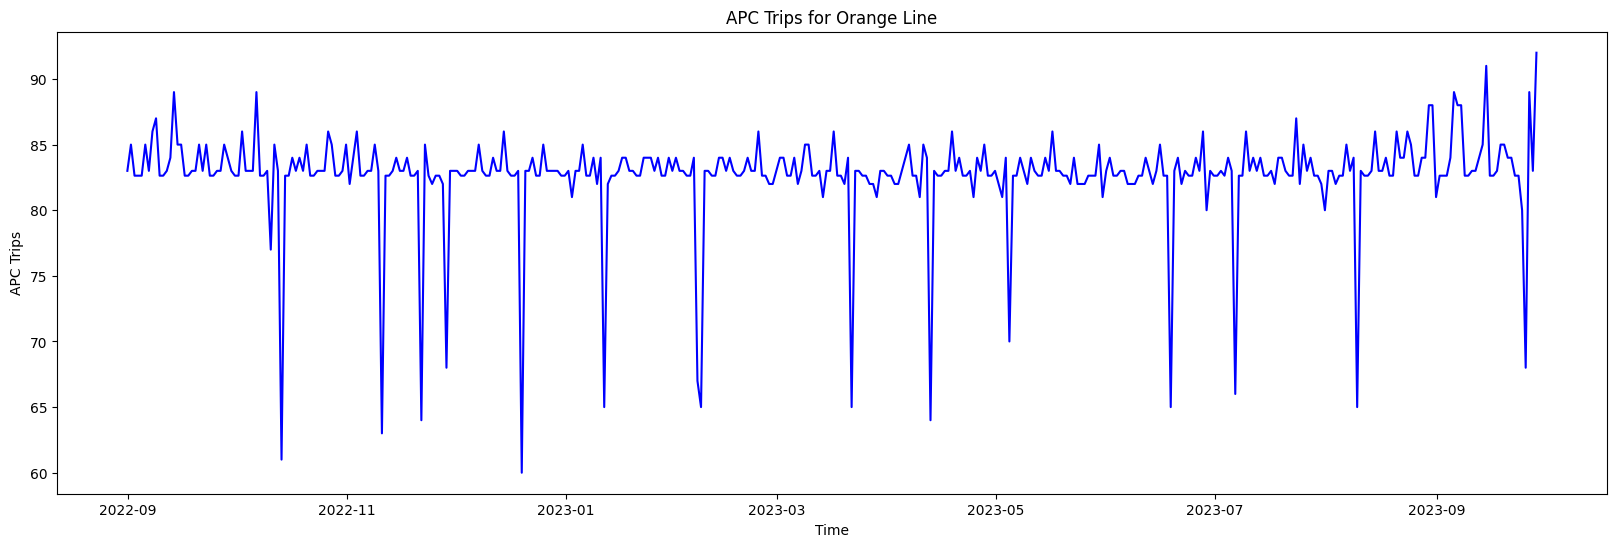

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(y5, label='Observed Data', color='blue')
plt.title('APC Trips for Orange Line')
plt.xlabel('Time')
plt.ylabel('APC Trips')
plt.savefig('/content/drive/MyDrive/Data_Science/figures/Mitchell_APC_Orange_Observed.png')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing

model = ExponentialSmoothing(y5, seasonal='mul', seasonal_periods=160).fit()

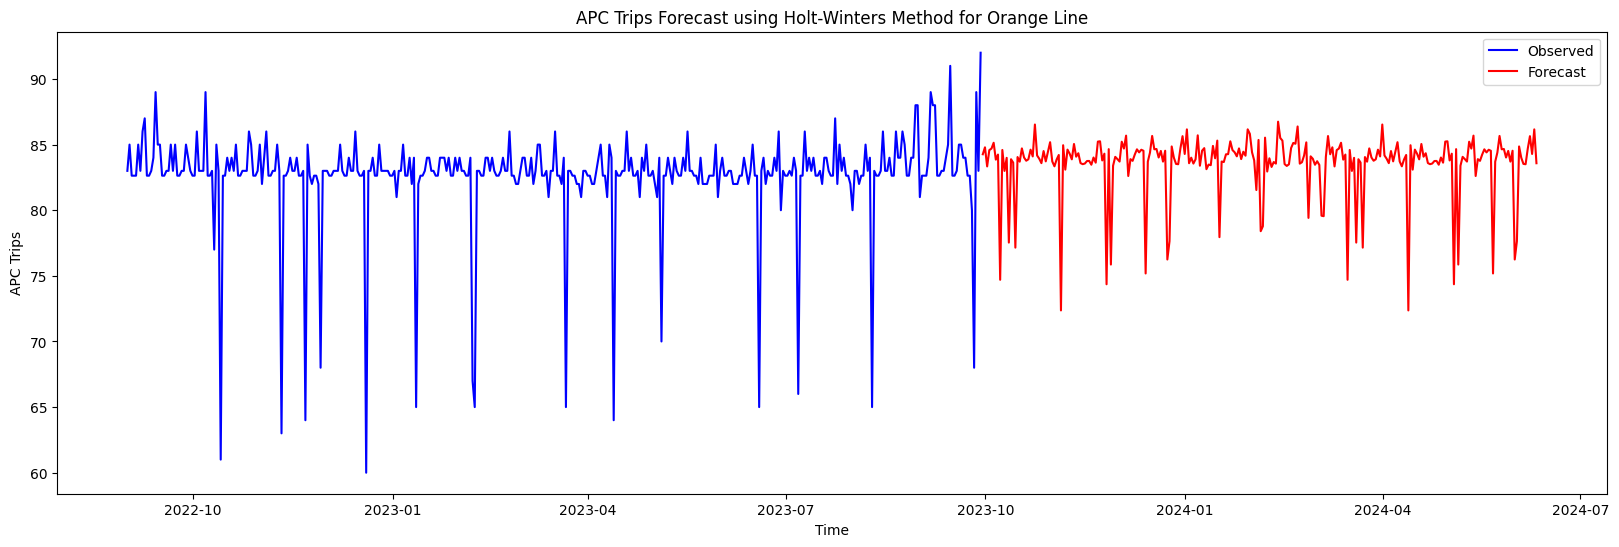

<Figure size 640x480 with 0 Axes>

In [ ]:
y5_forecasted = model.forecast(steps=256)
plt.figure(figsize=(20, 6))
plt.plot(y5, label='Observed', color='blue')
plt.plot(y5_forecasted, label='Forecast', color='red')
plt.title('APC Trips Forecast using Holt-Winters Method for Orange Line')
plt.xlabel('Time')
plt.ylabel('APC Trips')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Data_Science/figures/Mitchell_APC_Orange_predictions.png')